# TP3 : Les arbres binaires de recherche (ABR)

Voici la classe `ArbreBinaire` qui permet d'implementer les arbres binaires

In [1]:
from graphviz import Digraph # pour avoir une visualisation graphique d'un arbre

class ArbreBinaire:
    def __init__(self, valeur):
        self.set_valeur(valeur)
        self.filsG = None
        self.filsD = None

    def insert_gauche(self, valeur):
        if self.filsG == None:
            self.filsG = ArbreBinaire(valeur)
        else:
            nouveau_noeud = ArbreBinaire(valeur)
            nouveau_noeud.filsG = self.filsG
            self.filsG = nouveau_noeud

    def insert_droit(self, valeur):
        if self.filsD == None:
            self.filsD = ArbreBinaire(valeur)
        else:
            nouveau_noeud = ArbreBinaire(valeur)
            nouveau_noeud.filsD = self.filsD
            self.filsD = nouveau_noeud

    def get_valeur(self):
        return self.valeur
    
    def set_valeur(self,nouvelle_valeur):
        self.valeur = nouvelle_valeur

    def get_gauche(self):
        return self.filsG

    def get_droit(self):
        return self.filsD       

    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.filsG is not None:
                    representation(dot, noeud.filsG, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.filsG))))
                if noeud.filsD is not None:
                    representation(dot, noeud.filsD, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.filsD))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self, aretes)
        dot.edges(aretes)
        return dot

On souhaite implementer l'arbre binaire de recherche suivant : 

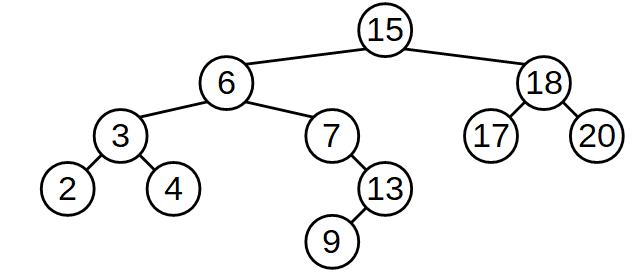

Donner le code permettant d'implémenter cet arbre

In [2]:
# votre code ICI

racine = ArbreBinaire(15)
racine.insert_gauche(6)
racine.insert_droit(18)

noeud_6 = racine.get_gauche()
noeud_6.insert_gauche(3)
noeud_6.insert_droit(7)

noeud_18 = racine.get_droit()
noeud_18.insert_gauche(17)
noeud_18.insert_droit(20)

noeud_3 = noeud_6.get_gauche()
noeud_3.insert_gauche(2)
noeud_3.insert_droit(4)

noeud_7 = noeud_6.get_droit()
noeud_7.insert_droit(13)

noeud_13 = noeud_7.get_droit()
noeud_13.insert_gauche(9)


## Affichage basique de l'arbre

In [3]:
def affiche(T):
    if T != None:
        return (T.get_valeur(),affiche(T.get_gauche()),affiche(T.get_droit()))

affiche(racine)

(15, (6, (3, (2, None, None), (4, None, None)), (7, None, (13, (9, None, None), None))), (18, (17, None, None), (20, None, None)))

## Affichage graphique de l'arbre *racine* :

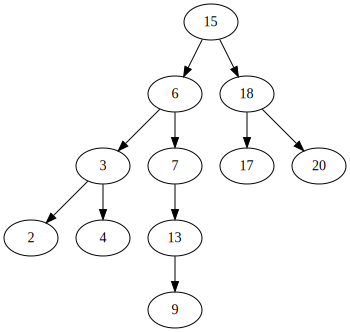

In [4]:
racine.show()

### Parcours infixe  

Appliquer l'algorithme de parcours Infixe à l'arbre précedent, Que constatez-vous?

In [5]:
def parcours_infixe(arb):
    if arb is not None: 
        parcours_infixe(arb.get_gauche())
        print(arb.get_valeur(), end=' ')
        parcours_infixe(arb.get_droit())

In [6]:
parcours_infixe(racine)

2 3 4 6 7 9 13 15 17 18 20 

## Recherche d'une valeur (une clef) dans un ABR

Voici l'algorithme que vous allez utiliser : 

```
Fonction ARBRE-RECHERCHE(arb,k) :  
  si arb == NIL :  
    renvoyer faux  
  fin si  
  x ← arb.racine  
  si k == x.clé :  
    renvoyer vrai  
  fin si  
  si k < x.clé :  
    ARBRE-RECHERCHE(x.gauche,k)  
  sinon :  
    ARBRE-RECHERCHE(x.droit,k)  
  fin si  
FIN  
```

In [7]:
def ArbreRecherche(arb, k):
    if arb is None :
        return False
    x = arb
    if k == x.get_valeur():
        print('ok')
        return True
    if k < x.get_valeur():
        ArbreRecherche(arb.get_gauche(), k)
    else:
        ArbreRecherche(arb.get_droit(), k)         

In [8]:
ArbreRecherche(racine, 13)

ok


Voici un autre algorithme possible (non recursif) :   
```
ARBRE-RECHERCHE_ITE(T,k) :
  x ← T.racine
  tant que T ≠ NIL et k ≠ x.clé :
    x ← T.racine
    si k < x.clé :
      T ← x.gauche
    sinon :
      T ← x.droit
    fin si
  fin tant que
  si k == x.clé :
    renvoyer vrai
  sinon :
    renvoyer faux
  fin si
FIN
```

In [9]:
def ArbreRecherche_ITE(arb, k):
    x = arb
    while (arb is not None) and (k != x.get_valeur()):
        x = arb
        if k < arb.get_valeur():
            arb = x.get_gauche()
        else:
            arb = x.get_droit()
    if k == x.get_valeur():
        return True
    else:
        return False

In [10]:
ArbreRecherche_ITE(racine, 13)

True

## Insertion d'une clé dans un arbre binaire de recherche

Voici l'algorithme que vous allez utiliser : 

```
Fonction Arbre_insertion(T,y) :
  x ← T.racine
  tant que T ≠ NIL :
    x ← T.racine
    si y.clé < x.clé :
      T ← x.gauche
    sinon :
      T ← x.droit
    fin si
  fin tant que
  si y.clé < x.clé :
    insérer y à gauche de x
  sinon :
    insérer y à droite de x
  fin si
FIN  
```

In [11]:
def Arbre_insertion(arb, k):
    x = arb
    while arb is not None:
        x = arb
        if k < arb.get_valeur():
            arb = x.get_gauche()
        else:
            arb = x.get_droit()
    if k < x.get_valeur():
        x.insert_gauche(k)
    else:
        x.insert_droit(k)

In [12]:
Arbre_insertion(racine, 16)
affiche(racine)

(15, (6, (3, (2, None, None), (4, None, None)), (7, None, (13, (9, None, None), None))), (18, (17, (16, None, None), None), (20, None, None)))

Affichage graphique de l'arbre *racine* modifié :

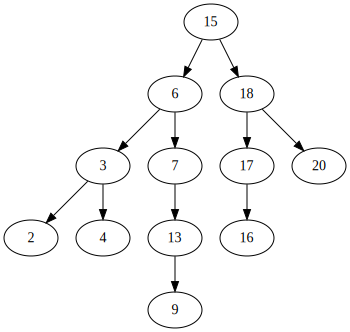

In [13]:
racine.show()